In [ ]:
# ================================
# Sentiment Analysis on SQL Server Data
# ================================

# 1. Connects to SQL Server and pulls reviews.

# 2. Uses TextBlob for sentiment scoring (Positive, Negative, Neutral).

# 3. Exports enriched dataset (.csv).

# Produces:

#   1. Sentiment distribution chart.

#   2. Average rating by sentiment.

#   3. Sentiment trend over time.

In [3]:
import pandas as pd
import pyodbc
from textblob import TextBlob
import matplotlib.pyplot as plt

In [4]:
# --------------------------
# 1. Connect to SQL Server
# --------------------------
conn = pyodbc.connect(
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=DESKTOP-NN982MH\SQLEXPRESS;"
    "Database=PortfolioProject_MarketingAnalytics;"
    "Trusted_Connection=yes;"   # Use UID/PWD if SQL authentication
)

<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\farhan\AppData\Local\Temp\ipykernel_4724\334049696.py:6: SyntaxWarning: invalid escape sequence '\S'
  "Server=DESKTOP-NN982MH\SQLEXPRESS;"


In [ ]:
query = """
SELECT CustomerID, ProductID, ReviewDate, Rating, ReviewText
FROM dbo.customer_reviews
"""
df = pd.read_sql(query, conn)
conn.close()

print("Sample Data:")
print(df.head())

In [6]:
# --------------------------
# 2. Preprocess Review Text
# --------------------------
df['ReviewText'] = df['ReviewText'].astype(str).str.strip()

In [7]:
# --------------------------
# 3. Sentiment Analysis
# --------------------------
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity   # -1 (negative) to 1 (positive)
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['ReviewText'].apply(get_sentiment)

In [8]:
# --------------------------
# 4. Save results (Optional)
# --------------------------
df.to_csv("customer_reviews_with_sentiment.csv", index=False)

print("Results saved to customer_reviews_with_sentiment.csv")


Results saved to customer_reviews_with_sentiment.csv



Sentiment Distribution:
 Sentiment
Positive    1063
Negative     200
Neutral      100
Name: count, dtype: int64


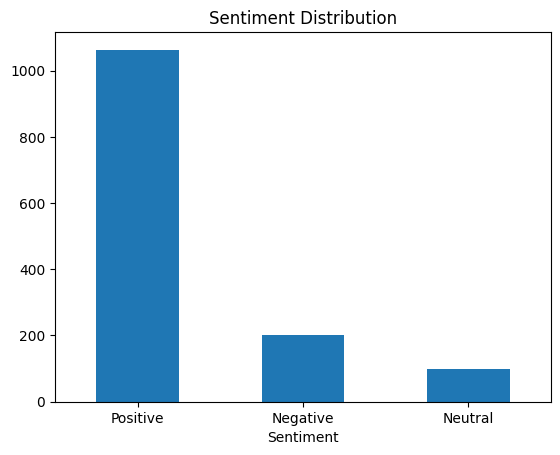

In [9]:
# --------------------------
# 5. Analysis & Visualization
# --------------------------

# Count sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)

sentiment_counts.plot(kind='bar', title="Sentiment Distribution", rot=0)
plt.show()


Average Rating per Sentiment:
 Sentiment
Negative    2.070000
Neutral     3.150000
Positive    4.041392
Name: Rating, dtype: float64


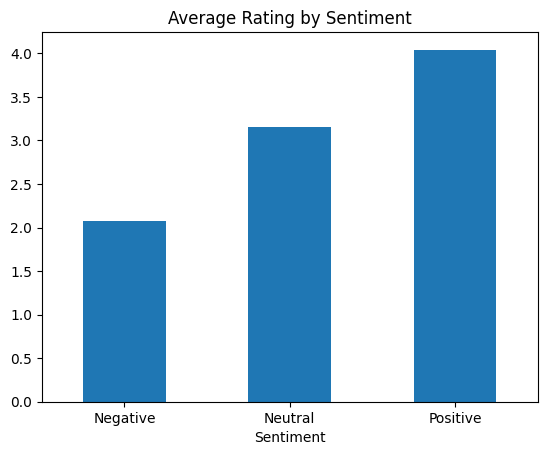

In [10]:
# Average rating per sentiment
avg_rating = df.groupby('Sentiment')['Rating'].mean()
print("\nAverage Rating per Sentiment:\n", avg_rating)

avg_rating.plot(kind='bar', title="Average Rating by Sentiment", rot=0)
plt.show()

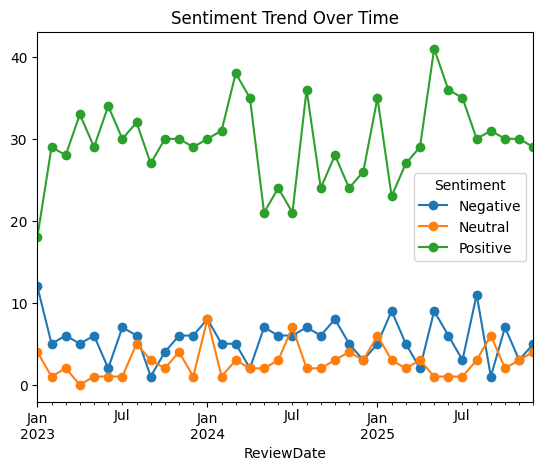

In [11]:
# Trend over time

df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])
trend = df.groupby([df['ReviewDate'].dt.to_period("M"), 'Sentiment']).size().unstack().fillna(0)
trend.plot(kind='line', marker='o', title="Sentiment Trend Over Time")
plt.show()